In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
import calendar
import plotly as pt
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from pylab import *
import matplotlib.patheffects as PathEffects
import dask.dataframe as dd


import warnings
warnings.filterwarnings('ignore')

In [2]:
datafile = 'US_Accidents_March23.csv'

## Data Preparation and Cleaning

In [3]:
%%time
df = dd.read_csv(datafile)

Wall time: 23.4 ms


In [4]:
%%time
df = df.compute()

Wall time: 1min 57s


In [5]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [7]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [8]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

13

Percentage of missing values per column

In [9]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
Traffic_Signal           0.000000e+00
Roundabout               0.000000e+00
Station                  0.000000e+00
Stop                     0.000000e+00
Traffic_Calm

<AxesSubplot:>

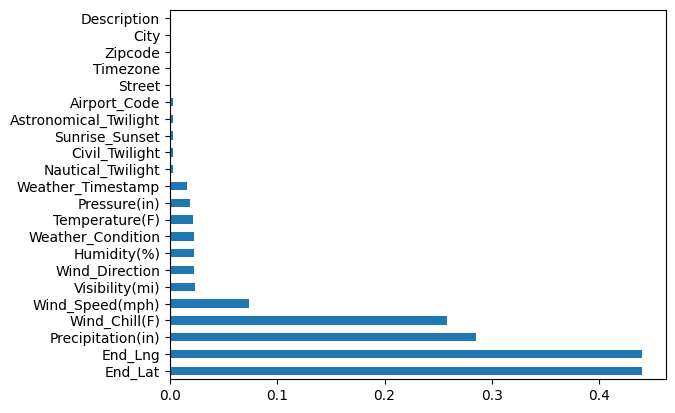

In [12]:
missing_percentages[missing_percentages !=0].plot(kind = 'barh')

## Exploratory Analysis and Visualization

In [13]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### City

In [14]:
df.City

0               Dayton
1         Reynoldsburg
2         Williamsburg
3               Dayton
4               Dayton
              ...     
173285       Riverside
173286       San Diego
173287          Orange
173288     Culver City
173289        Highland
Name: City, Length: 7728394, dtype: object

In [15]:
cities = df.City.unique()
len(cities)

13679

In [16]:
states = df.State.unique()
len(states)

49

In [17]:
df.County

0             Montgomery
1               Franklin
2               Clermont
3             Montgomery
4             Montgomery
               ...      
173285         Riverside
173286         San Diego
173287            Orange
173288       Los Angeles
173289    San Bernardino
Name: County, Length: 7728394, dtype: object

In [18]:
county = df.County.unique()
len(county)

1871

Total 49 States and  13679 Cities data avl.

In [19]:
cities_by_accident = df.City.value_counts()
cities_by_accident

Miami               186917
Houston             169609
Los Angeles         156491
Charlotte           138652
Dallas              130939
                     ...  
Selby                    1
Millry                   1
North Bennington         1
Clyde Hill               1
Clarks                   1
Name: City, Length: 13678, dtype: int64

In [20]:
cities_by_accident[:20]

Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: City, dtype: int64

In [21]:
type(cities_by_accident)

pandas.core.series.Series

<AxesSubplot:>

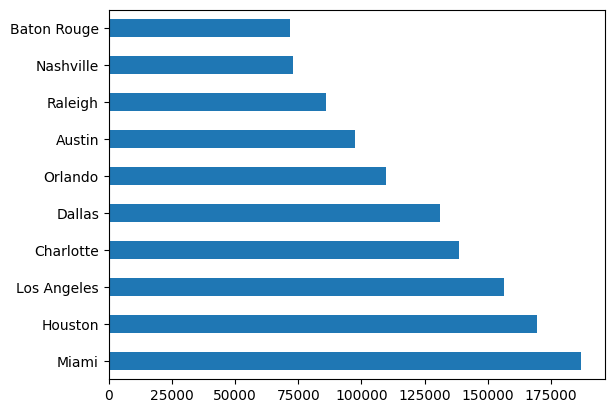

In [22]:
cities_by_accident[:10].plot(kind = 'barh')

In [23]:
states_by_accident = df.State .value_counts()
states_by_accident

CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
AZ     170609
GA     169234
IL     168958
TN     167388
MI     162191
LA     149701
NJ     140719
MD     140417
OH     118115
WA     108221
AL     101044
UT      97079
CO      90885
OK      83647
MO      77323
CT      71005
IN      67224
MA      61996
WI      34688
KY      32254
NE      28870
MT      28496
IA      26307
AR      22780
NV      21665
KS      20992
DC      18630
RI      16971
MS      15181
DE      14097
WV      13793
ID      11376
NM      10325
NH      10213
WY       3757
ND       3487
ME       2698
VT        926
SD        289
Name: State, dtype: int64

In [24]:
states_by_accident[:10]
States_list = ['CA', 'FL', 'TX', 'SC', 'NY', 'NC', 'VA', 'PA', 'MN', 'OR']

<AxesSubplot:>

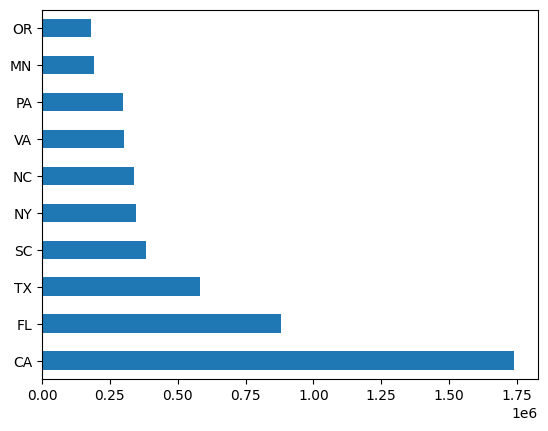

In [25]:
states_by_accident[:10].plot(kind = 'barh')

In [26]:
sns.set_style("darkgrid")

<AxesSubplot:xlabel='City', ylabel='Count'>

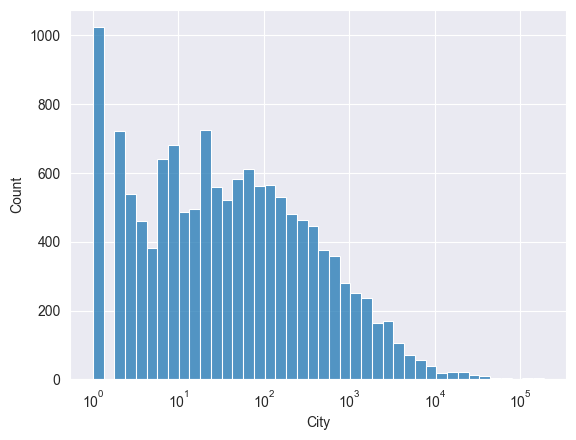

In [27]:
sns.histplot(cities_by_accident, log_scale=True)

<AxesSubplot:xlabel='State', ylabel='Count'>

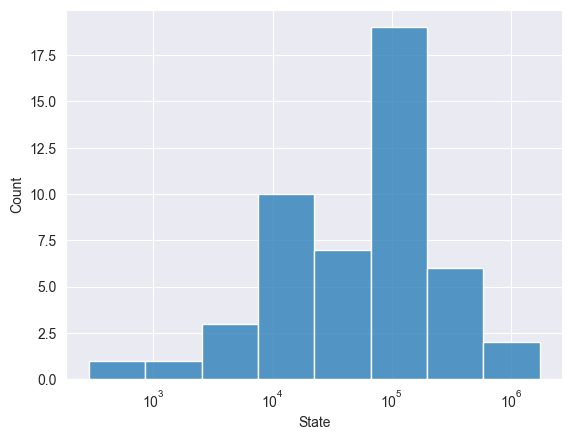

In [28]:
sns.histplot(states_by_accident, log_scale=True)

In [29]:
cities_by_accident[cities_by_accident == 1]

Texola              1
Armada              1
Emigsville          1
North Collins       1
Wolfe City          1
                   ..
Selby               1
Millry              1
North Bennington    1
Clyde Hill          1
Clarks              1
Name: City, Length: 1023, dtype: int64

In [30]:
states_by_accident[states_by_accident <= 1000]

VT    926
SD    289
Name: State, dtype: int64

Start Time

In [31]:
df.Start_Time

0         2016-02-08 05:46:00
1         2016-02-08 06:07:59
2         2016-02-08 06:49:27
3         2016-02-08 07:23:34
4         2016-02-08 07:39:07
                 ...         
173285    2019-08-23 18:03:25
173286    2019-08-23 19:11:30
173287    2019-08-23 19:00:21
173288    2019-08-23 19:00:21
173289    2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: object

In [32]:
df.Start_Time = pd.to_datetime(df.Start_Time)

<AxesSubplot:xlabel='Start_Time'>

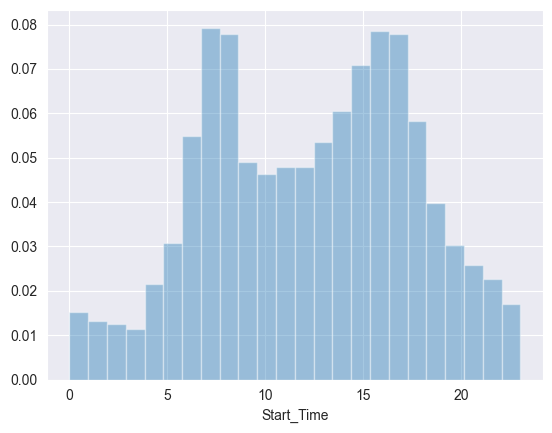

In [33]:
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

- A high percentage of accidents occur between 6 am to 10 am (probably people in a hurry to get to work)
- Next higest percentage is 3 pm to 6 pm.

<AxesSubplot:xlabel='Start_Time'>

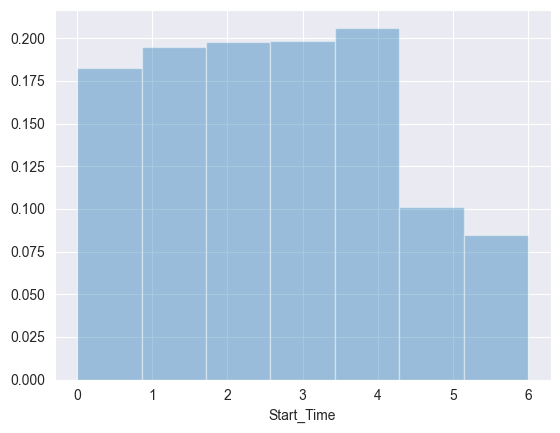

In [34]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

<AxesSubplot:xlabel='Start_Time'>

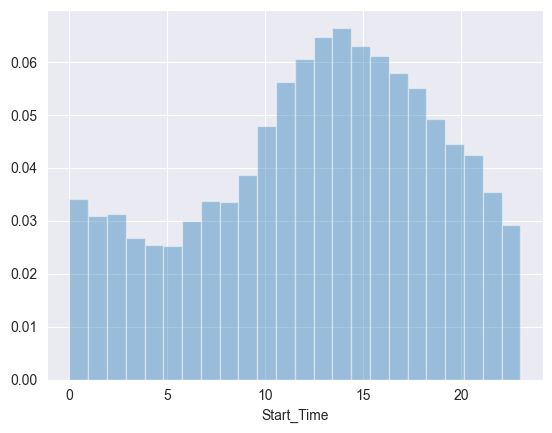

In [35]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

On Sundays, the peak occurs between 10 am and 3 pm, unlike weekdays

<AxesSubplot:xlabel='Start_Time'>

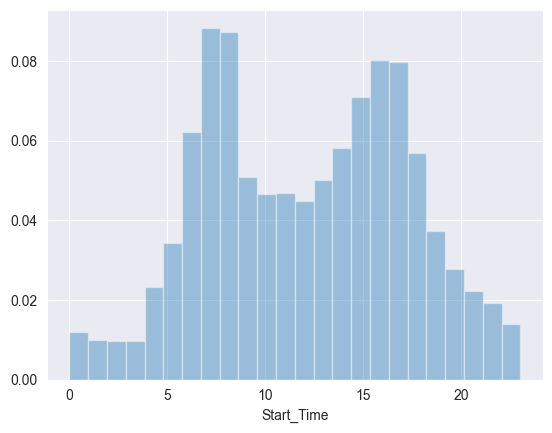

In [36]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(monday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

In [37]:
df.Source

0         Source2
1         Source2
2         Source2
3         Source2
4         Source2
           ...   
173285    Source1
173286    Source1
173287    Source1
173288    Source1
173289    Source1
Name: Source, Length: 7728394, dtype: object

In [38]:
df['Source'] = df['Source'].replace(['Source1', 'Source2', 'Source3'], ['MapQuest', 'Bing', 'Bing-MapQuest'])

In [39]:
df.Source.unique()

array(['Bing', 'Bing-MapQuest', 'MapQuest'], dtype=object)

In [40]:
df.Source.value_counts()

MapQuest         4325632
Bing             3305373
Bing-MapQuest      97389
Name: Source, dtype: int64

<AxesSubplot:xlabel='Start_Time'>

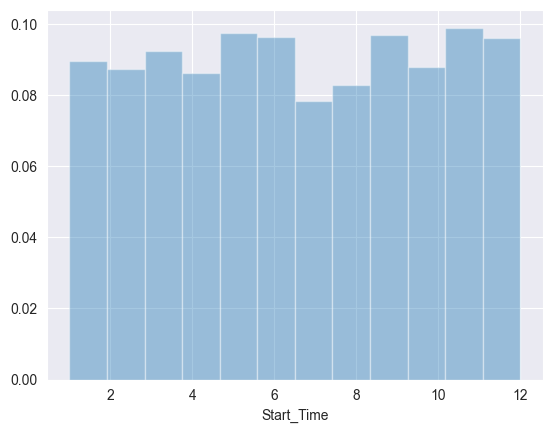

In [41]:
df_2022 = df[df.Start_Time.dt.year == 2021]
df_2022_Bing = df_2022[df_2022.Source == 'Bing']
sns.distplot(df_2022_Bing.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

<AxesSubplot:ylabel='Source'>

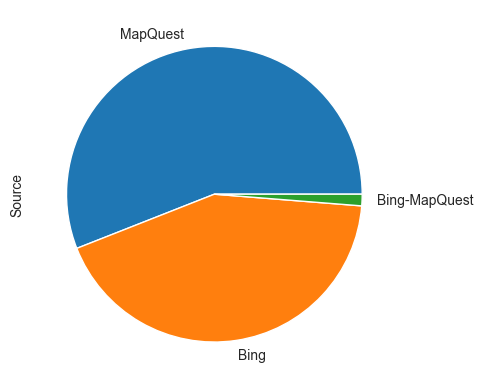

In [42]:
df.Source.value_counts().plot(kind='pie')

Start Latitude & Longitude

In [43]:
df.Start_Lat

0         39.865147
1         39.928059
2         39.063148
3         39.747753
4         39.627781
            ...    
173285    34.002480
173286    32.766960
173287    33.775450
173288    33.992460
173289    34.133930
Name: Start_Lat, Length: 7728394, dtype: float64

In [44]:
df.Start_Lng

0         -84.058723
1         -82.831184
2         -84.032608
3         -84.205582
4         -84.188354
             ...    
173285   -117.379360
173286   -117.148060
173287   -117.847790
173288   -118.403020
173289   -117.230920
Name: Start_Lng, Length: 7728394, dtype: float64

In [45]:
sample_df = df.sample(int(0.1 * len(df)))

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

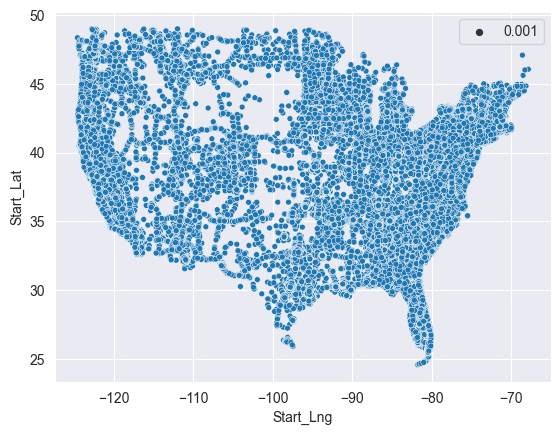

In [46]:
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

# City Analysis

In [50]:
# create a dataframe of City and their corresponding accident cases
city_df = pd.DataFrame(df['City'].value_counts()).reset_index().rename(columns={'index':'City', 'City':'Cases'})

In [52]:
city_df.head(10)

,City,Cases
0,Miami,186917
1,Houston,169609
2,Los Angeles,156491
3,Charlotte,138652
4,Dallas,130939
5,Orlando,109733
6,Austin,97359
7,Raleigh,86079
8,Nashville,72930
9,Baton Rouge,71588


In [53]:
top_10_cities = pd.DataFrame(city_df.head(10))

In [55]:
total_cases = len(df)

# Calculate the percentage of total cases for each city
top_10_cities['Percentage'] = (top_10_cities['Cases'] / total_cases) * 100

# Define custom colors for the bars
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                 '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

fig = px.bar(
    top_10_cities,
    x='City',
    y='Cases',
    color='City',  
    color_discrete_sequence=custom_colors, 
    text='Percentage',  
    labels={'Percentage': 'Percentage (%)', 'Cases': 'Accident Cases', 'City': 'Cities'}  
)

fig.update_xaxes(tickangle=45) 

# Display percentage as text on top of bars with a specific format
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

fig.update_layout(showlegend=False,
                  title={'text':'City with Maximum no. of Road Accidents(2016-2022)', 'x':0.5}                 )

fig.show()

In [56]:
top_10_cities['Percentage'].sum()

15.789787632462838

## Insights:

1. **Miami** is the city with **highest (2.41%)** no. of road accidents in US (2016-2022).
2. **Houston** is the city with **2nd highest (2.19%)** no. of road accidents in US (2016-2022).
3. Around **16%** accident records of past 7 years are only from these **10** cities out of **13,679** cities in US (as per the dataset).

In [57]:
highest_cases = city_df.Cases[0]
print(round(highest_cases/7))
print(round(highest_cases/(7*365)))

26702
73


## Insights:
4. In past 7 years (2016-2022) **yearly 26,702** road accidents (average) happened in Miami.
5. In **Miami** averagely in every **12 hours 36 accidents** occurred.

In [58]:
city_coordinates = {
    'Miami': (25.7617, -80.1918),
    'Houston': (29.7604, -95.3698),
    'Los Angeles': (34.0522, -118.2437),
    'Charlotte': (35.2271, -80.8431),
    'Dallas': (32.7767, -96.7970),
    'Orlando': (28.5383, -81.3792),
    'Austin': (30.2672, -97.7431),
    'Raleigh': (35.7796, -78.6382),
    'Nashville': (36.1627, -86.7816),
    'Baton Rouge': (30.4515, -91.1871)
}

In [59]:
# Add latitude and longitude columns to the DataFrame based on the city_coordinates dictionary
top_10_cities['Latitude'] = top_10_cities['City'].map(lambda city: city_coordinates[city][0])
top_10_cities['Longitude'] = top_10_cities['City'].map(lambda city: city_coordinates[city][1])

In [73]:
fig = px.scatter_geo(
    top_10_cities,
    lat='Latitude',
    lon='Longitude',
    text='City',  
    color='Cases', 
    color_continuous_scale='Viridis',  
)

fig.update_layout(showlegend=False,
                  title={'text':'Top 10 Cities on Map', 'x':0.5}                 )



fig.show()

## Insight:
6. 3 out of top 10 cities with most no. of accident cases is from the state, Texas.

In [61]:
# custom fuction for percentage of Accidents
def city_cases_percentage(val, operator):
    if operator == '<':
        res = city_df[city_df['Cases']<val].shape[0]
    elif operator == '>':
        res = city_df[city_df['Cases']>val].shape[0]
    elif operator == '=':
        res = city_df[city_df['Cases']==val].shape[0]
    print(f'{res} Cities, {round(res*100/city_df.shape[0], 2)}%')

In [62]:
city_cases_percentage(1, '=')
city_cases_percentage(100, '<')
city_cases_percentage(1000, '<')
city_cases_percentage(1000, '>')
city_cases_percentage(5000, '>')
city_cases_percentage(10000, '>')

1023 Cities, 7.48%
8947 Cities, 65.41%
12460 Cities, 91.1%
1215 Cities, 8.88%
231 Cities, 1.69%
105 Cities, 0.77%


# State Analysis

In [64]:
# create a dictionary using US State code and their corresponding Name
us_states = {'AK': 'Alaska',
 'AL': 'Alabama',
 'AR': 'Arkansas',
 'AS': 'American Samoa',
 'AZ': 'Arizona',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DC': 'District of Columbia',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'GU': 'Guam',
 'HI': 'Hawaii',
 'IA': 'Iowa',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'MA': 'Massachusetts',
 'MD': 'Maryland',
 'ME': 'Maine',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MO': 'Missouri',
 'MP': 'Northern Mariana Islands',
 'MS': 'Mississippi',
 'MT': 'Montana',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'NE': 'Nebraska',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NV': 'Nevada',
 'NY': 'New York',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'PR': 'Puerto Rico',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VA': 'Virginia',
 'VI': 'Virgin Islands',
 'VT': 'Vermont',
 'WA': 'Washington',
 'WI': 'Wisconsin',
 'WV': 'West Virginia',
 'WY': 'Wyoming'}

In [65]:
# State and their corresponding accidents cases 
state_df = pd.DataFrame(df['State'].value_counts()).reset_index().rename(columns={'index':'State', 'State':'Cases'})

In [67]:
state_df.head()

,State,Cases
0,CA,1741433
1,FL,880192
2,TX,582837
3,SC,382557
4,NY,347960


In [68]:
# convert the state code with name 
def convert(x): return us_states[x]

state_df['State'] = state_df['State'].apply(convert)

In [71]:
top_10_states = pd.DataFrame(state_df.head(10))

In [72]:
top_10_states

,State,Cases
0,California,1741433
1,Florida,880192
2,Texas,582837
3,South Carolina,382557
4,New York,347960
5,North Carolina,338199
6,Virginia,303301
7,Pennsylvania,296620
8,Minnesota,192084
9,Oregon,179660


In [74]:
total_cases = len(df)

# Calculate the percentage of total cases for each state
top_10_states['Percentage'] = (top_10_states['Cases'] / total_cases) * 100

# Define custom colors for the bars
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                 '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

fig = px.bar(
    top_10_states,
    x='State',
    y='Cases',
    color='State',  
    color_discrete_sequence=custom_colors, 
    text='Percentage', 
    labels={'Percentage': 'Percentage (%)', 'Cases': 'Accident Cases', 'State': 'States'}  
)


fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

fig.update_layout(showlegend=False,
                  title={'text':'Top 10 States with Maximum no. of Road Accidents(2016-2022)', 'x':0.5} 
                 )


fig.show()

In [75]:
highest_state_cases = state_df.Cases[0]

In [76]:
print(round(highest_state_cases/7))
print(round(highest_state_cases/(7*365)))

248776
682


In [77]:
# create a dataframe of State and their corresponding accident cases
last_10_states = pd.DataFrame(state_df.tail(10))

In [78]:
last_10_states

,State,Cases
39,Delaware,14097
40,West Virginia,13793
41,Idaho,11376
42,New Mexico,10325
43,New Hampshire,10213
44,Wyoming,3757
45,North Dakota,3487
46,Maine,2698
47,Vermont,926
48,South Dakota,289


In [79]:
total_cases = len(df)

# Calculate the percentage of total cases for each state
last_10_states['Percentage'] = (last_10_states['Cases'] / total_cases) * 100

# Define custom colors for the bars
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                 '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

fig = px.bar(
    last_10_states,
    x='State',
    y='Cases',
    color='State',  
    color_discrete_sequence=custom_colors, 
    text='Percentage',
    labels={'Percentage': 'Percentage (%)', 'Cases': 'Accident Cases', 'State': 'States'} 
)


# Display percentage as text on top of bars with a specific format
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

fig.update_layout(showlegend=False,
                 title={'text':'Top 10 States with least no. of Road Accidents(2016-2022)', 'x':0.5})

fig.show()

## Insights:
17. **South Dakota** is the city with lowest no. of road accidents in past 7 years.(Might missing data)
18. Only **289** accidents took place in **South Dakota** in past 7 years implies **yearly 41 cases** in average.

# Timezone Analysis

In [80]:
# create a dataframe of Timezone and their corresponding accident cases
timezone_df = pd.DataFrame(df['Timezone'].value_counts()).reset_index().rename(columns={'index':'Timezone', 'Timezone':'Cases'})

In [81]:
timezone_df

,Timezone,Cases
0,US/Eastern,3580167
1,US/Pacific,2062984
2,US/Central,1645616
3,US/Mountain,431819


In [82]:
total_cases = len(df)

# Calculate the percentage of total cases for each Timezone
timezone_df['Percentage'] = (timezone_df['Cases'] / total_cases) * 100

# Define custom colors for the bars
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

fig = px.bar(
    timezone_df,
    x='Timezone',
    y='Cases',
    color='Timezone',  
    color_discrete_sequence=custom_colors,  
    text='Percentage',  
    labels={'Percentage': 'Percentage (%)', 'Cases': 'Accident Cases', 'Timezone': 'Timezones'}  
)


# Display percentage as text on top of bars with a specific format
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

fig.update_layout(showlegend=False,
                 title={'text':'Percentage of Accidents Cases for differnt Timezones in US (2016-2022)', 'x':0.5}
                 )

fig.show()

## Insights:
19. **Eastern** time zone region of US has the **highest no. of road accident cases (46%)** in past 7 years.
20. **Mountain** time zone region of US has the **lowest no. of road accident cases (5%)** in past 7 years.

# Street Analysis

In [83]:
# create a dataframe of Street and their corresponding accident cases
street_df = pd.DataFrame(df['Street'].value_counts()).reset_index().rename(columns={'index':'Street No.', 'Street':'Cases'})

In [84]:
top_10_streets_df = pd.DataFrame(street_df.head(10))

In [85]:
top_10_streets_df

,Street No.,Cases
0,I-95 N,78430
1,I-95 S,74528
2,I-5 N,71968
3,I-10 E,55572
4,I-10 W,53725
5,I-5 S,51781
6,I-80 W,39662
7,I-80 E,36113
8,I-405 N,32364
9,I-75 N,28166


In [86]:
total_cases = len(df)

# Calculate the percentage of total cases for each streets
top_10_streets_df['Percentage'] = (top_10_streets_df['Cases'] / total_cases) * 100

# Define custom colors for the bars
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                 '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

fig = px.bar(
    top_10_streets_df,
    x='Street No.',
    y='Cases',
    color='Street No.',  
    color_discrete_sequence=custom_colors,  
    text='Percentage',  
    labels={'Percentage': 'Percentage (%)', 'Cases': 'Accident Cases', 'Street No.': 'Street No.'} 
)

# Display percentage as text on top of bars with a specific format
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

fig.update_layout(showlegend=False,
                 title={'text':'Top 10 Accident Prone Streets in US (2016-2022)', 'x':0.5})

fig.show()

## Insights:
21. In last 7 years (2016-2022) **Street No. I-95 N** is having the **highest road accidents records**.
22. In **Street No. I-95 N**, daily **30 accidents occurred** in average.

In [88]:
# custom fuction for percentage of Accidents
def street_cases_percentage(val, operator):
    if operator == '=':
        val = street_df[street_df['Cases']==val].shape[0]
    elif operator == '>':
        val = street_df[street_df['Cases']>val].shape[0]
    elif operator == '<':
        val = street_df[street_df['Cases']<val].shape[0]
    print('{:,d} Streets, {}%'.format(val, round(val*100/street_df.shape[0], 2)))

In [90]:
len(street_df)

336306

In [89]:
street_cases_percentage(1, '=')
street_cases_percentage(100, '<')
street_cases_percentage(1000, '<')
street_cases_percentage(1000, '>')
street_cases_percentage(5000, '>')

129,934 Streets, 38.64%
326,421 Streets, 97.06%
335,489 Streets, 99.76%
817 Streets, 0.24%
133 Streets, 0.04%


## Insights:
In Our dataset, there are total 3,36,306 Streets enlisted for accidental cases,

23. There are **1,29,934 Streets (38%)** in US which have **only 1 accident** record in past 7 years.
24. **97% Streets** of US, have **less than 100** road accident cases.
25. Only **0.2% Streets** in US have the accident cases **greater than 1000**.
26. In last 7 years record of road accidents, only **24 Streets (0.04%)** have **greater than 5000** cases.

# Year Analysis

In [93]:
# create a dataframe of Year and the corresponding accident cases
year_df = pd.DataFrame(df.Start_Time.dt.year.value_counts()).reset_index().rename(columns={'index':'Year', 'Start_Time':'Cases'})

In [107]:
year_df 

,Year,Cases,Percentage
0,2022,1762452,22.804893
1,2021,1563753,20.233867
2,2020,1178913,15.254308
3,2019,954303,12.348012
4,2018,893426,11.560306
5,2017,718093,9.291620
6,2016,410821,5.315736


In [109]:
# Calculate the total cases
total_cases = len(df)

# Calculate the percentage of total cases for each Year
year_df['Percentage'] = (year_df['Cases'] / total_cases) * 100

fig = px.bar(
    year_df,
    x='Year',
    y='Cases',
    color='Year',  
    text='Percentage',  
    labels={'Percentage': 'Percentage (%)', 'Cases': 'Accident Cases', 'Year': 'Years'}  
)

fig.update_xaxes(tickangle=45) 

# Display percentage as text on top of bars with a specific format
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

# Remove the legend
fig.update_layout(showlegend=False,
                 title={'text':'Road Accident Percentage over past 7 Years in US (2016-2022)', 'x':0.5})

fig.show()


In [112]:
fig = px.line(year_df, x="Year", y="Cases", title="Yearly Road Accidents", markers=True)
fig.update_yaxes(title_text="Cases")
fig.update_xaxes(title_text="Year")
fig.update_layout(showlegend=False,
                 title={'text':'Yearly Road Accidents', 'x':0.5})


## Insights:
29. From the above figure, it is clear that in **last 7 years (2016-2022)** in US **accidents percentage** has **increased** significantly.

30. **43%** of the total road accident records of last 7 years happened only within **last 2 years (2021, 2022)**.

In [113]:
#add column for avg. cases of Accident/Day ans Accident/Hour
year_df['accident/day'] = round(year_df['Cases']/(7*365))
year_df['accident/hour'] = round(year_df['Cases']/(7*365*24))

In [114]:
year_df

,Year,Cases,Percentage,accident/day,accident/hour
0,2022,1762452,22.804893,690.0,29.0
1,2021,1563753,20.233867,612.0,26.0
2,2020,1178913,15.254308,461.0,19.0
3,2019,954303,12.348012,374.0,16.0
4,2018,893426,11.560306,350.0,15.0
5,2017,718093,9.291620,281.0,12.0
6,2016,410821,5.315736,161.0,7.0


In [116]:
fig = px.bar(
    year_df,
    x='Year',
    y='accident/day',
    color='Year',
    text_auto = 'accident/day',  
    labels={'accident/day': 'Accident Cases', 'Year': 'Years'} 
)

fig.update_xaxes(tickangle=45) 
fig.update_traces(textfont_size=16, textangle=0, cliponaxis=False)
# Remove the legend
fig.update_layout(
    title={'text': 'Average Cases of Accident/Day in US (2016-2022)', 'x': 0.5},
    showlegend=False)


fig.show()


In [117]:
fig = px.bar(
    year_df,
    x='Year',
    y='accident/hour',
    color='Year',
    text_auto = 'accident/hour',
    labels={'accident/hour': 'Accident Cases', 'Year': 'Years'} 
)

fig.update_xaxes(tickangle=45) 
fig.update_traces(textfont_size=16, textangle=0, cliponaxis=False)

# Remove the legend
fig.update_layout(
    title={'text': 'Average Cases of Accident/Hour in US (2016-2022)', 'x': 0.5}, 
    showlegend=False)

fig.show()

## Insights:
30. In the year **2022**, averagely **690 accidents** happened **per day** in US.
31. From **2018 to 2022** the **average accident/day** has **increased 2 times** in US.
32. Compare to **2016** the **accident/hour** has **increased 2.5 times** in 2022.
33. In the year **2022**, averagely **29 accidents** happened **per hour** in US implies that **5 accidents in every 10 minutes**.

# Month Analysis

In [118]:
# create a dataframe of Month and the corresponding accident cases
month_df = pd.DataFrame(df.Start_Time.dt.month.value_counts()).reset_index().rename(columns={'index':'Month', 'Start_Time':'Cases'}).sort_values('Month')

In [119]:
month_df

,Month,Cases
2,1,751946
4,2,658984
10,3,554595
7,4,587300
9,5,558176
8,6,571373
11,7,512335
6,8,599666
5,9,651381
3,10,675130


In [121]:
month_names = list(calendar.month_name)[1:]
month_df.Month = month_names

In [122]:
month_df

,Month,Cases
2,January,751946
4,February,658984
10,March,554595
7,April,587300
9,May,558176
8,June,571373
11,July,512335
6,August,599666
5,September,651381
3,October,675130


In [124]:
# Calculate the total cases
total_cases = len(df)

# Calculate the percentage of total cases for each month
month_df['Percentage'] = (month_df['Cases'] / total_cases) * 100


fig = px.bar(
    month_df,
    x='Cases',
    y='Month',
    color='Month', 
    text='Percentage', 
    labels={'Percentage': 'Percentage (%)', 'Cases': 'Accident Cases', 'Month': 'Months'}  # Label for the y-axis
)

fig.update_xaxes(tickangle=45) 

# Display percentage as text on top of bars with a specific format
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

# Remove the legend
fig.update_layout(showlegend=False,
                  title={'text': 'Road Accident Percentage for different months in US (2016-2022)', 'x': 0.5},  
                  )

fig.show()


## Insights:
34. Around **11%** of the road accidents occurred in the month of **December**.
35. **July** is month with **least (6.63%)** no. of road accidents in US.
36. **30%** of the road accidents occurred only within the 3 months, **December to February (In Winter)**.

In [125]:
day_df = pd.DataFrame(df.Start_Time.dt.day_name().value_counts()).reset_index().rename(columns={'index':'Day', 'Start_Time':'Cases'})

In [126]:
day_df

,Day,Cases
0,Friday,1366499
1,Thursday,1316229
2,Wednesday,1312389
3,Tuesday,1290929
4,Monday,1210921
5,Saturday,668683
6,Sunday,562744


In [127]:
# Calculate the total cases
total_cases = len(df)

# Calculate the percentage of total cases for each day
day_df['Percentage'] = (day_df['Cases'] / total_cases) * 100


fig = px.bar(
    day_df,
    x='Day',
    y='Cases',
    color='Day',  
    text='Percentage',  
    labels={'Percentage': 'Percentage (%)', 'Cases': 'Accident Cases', 'Day': 'Day of the Week'}  
)

fig.update_xaxes(tickangle=45) 

# Display percentage as text on top of bars with a specific format
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

     
# Remove the legend
fig.update_layout(showlegend=False,
                  title={'text': 'Road Accident Percentage for different days over the week in US (2016-2022)', 'x': 0.5},  
                 )

fig.show()


## Insights:
37. **Working Days** of the week have almost **2 times higher** accident percentage, compared with the **Weekend Days** which is as our expectation.
38. Only around **16%** road accident records occurred in **weekend**.
39. **Friday** of a week is having the **highest** percentage of road accidents.
40. On **Sunday** the percentage of road accidents in US is **lowest**.

# Hour Analysis

In [128]:
hour_df = pd.DataFrame(df.Start_Time.dt.hour.value_counts()).reset_index().rename(columns={'index':'Hours', 'Start_Time':'Cases'}).sort_values('Hours')

In [129]:
hour_df

,Hours,Cases
20,0,112378
21,1,97071
22,2,93227
23,3,83863
18,4,159852
14,5,228182
7,6,405837
0,7,587472
2,8,577576
9,9,363034


In [130]:
# Calculate the total cases
total_cases = len(df)

# Calculate the percentage of total cases for each city
hour_df['Percentage'] = (hour_df['Cases'] / total_cases) * 100


fig = px.bar(
    hour_df,
    x='Hours',
    y='Cases',
    color='Hours', 
    color_discrete_sequence = custom_colors,  
    text='Percentage',  
    labels={'Percentage': 'Percentage (%)', 'Cases': 'Accident Cases', 'Hours': 'Hours'} 
)

fig.update_xaxes(tickangle=45) 

# Display percentage as text on top of bars with a specific format
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

     
# Remove the legend
fig.update_layout(showlegend=False,
                  title={'text': 'Road Accident Percentage for different hours along the day in US (2016-2022)', 'x': 0.5},  
                 )

fig.show()


## Insights:
41. Around **20%** of the road accidents occurred in between **6:00AM to 9:00AM**.

42. In evening, around **27%** of the road accidents occurred in between **3:00PM to 6:00PM**.

43. The **most-deadliest accident hour** is **7:00AM** implies the Morning Office-Going Hours.

44. The **2nd most-deadliest accident hour** is **4:00PM** implies the Evening Office-Returning Hours.

# Road Condition Analysis

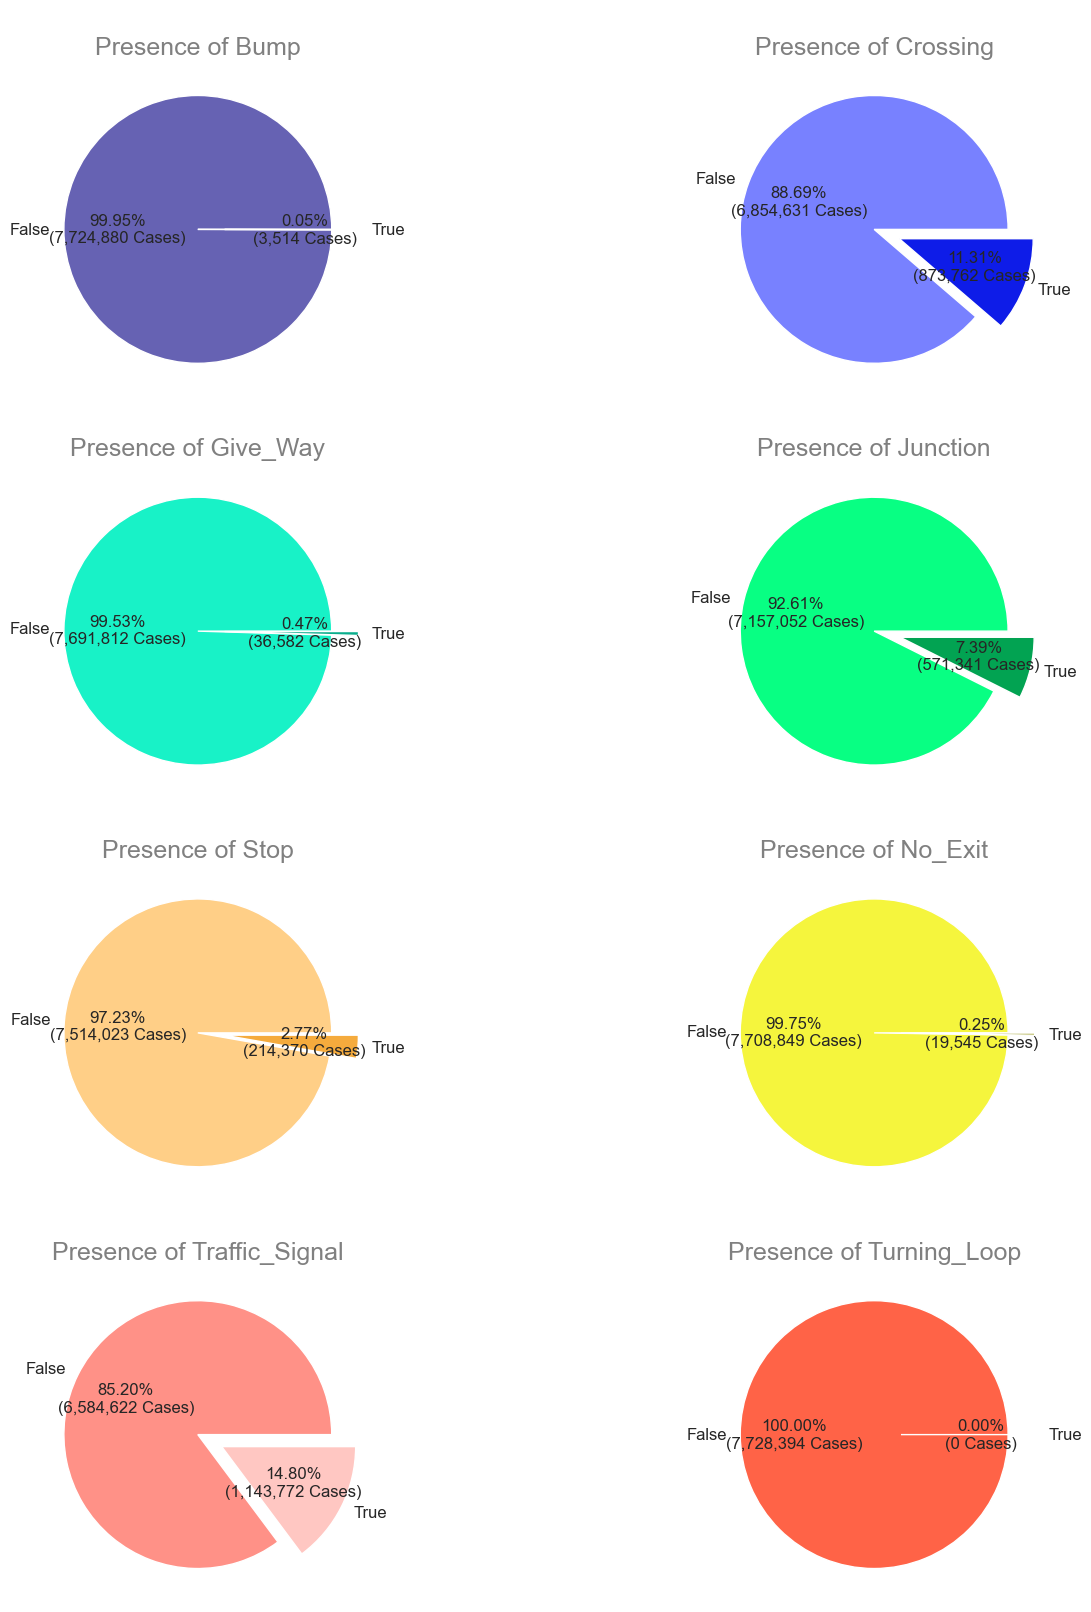

In [149]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2, figsize = (16,20))

road_conditions = ['Bump', 'Crossing', 'Give_Way', 'Junction', 'Stop', 'No_Exit', 'Traffic_Signal', 'Turning_Loop']
colors = [('#6662b3', '#00FF00'), ('#7881ff', '#0e1ce8'), ('#18f2c7', '#09ad8c'), ('#08ff83', '#02a352'), ('#ffcf87', '#f5ab3d'),
         ('#f5f53d', '#949410'), ('#ff9187', '#ffc7c2'), ('tomato', '#008000')]    
count = 0

def func(pct, allvals):
    absolute = int(round(pct/100*np.sum(allvals), 2))
    return "{:.2f}%\n({:,d} Cases)".format(pct, absolute)    

for i in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
    
    size = list(df[road_conditions[count]].value_counts())
    if len(size) != 2:
        size.append(0)
    
    labels = ['False', 'True']
    
    
    
    i.pie(size, labels = labels, colors = colors[count],
                    autopct = lambda pct: func(pct, size), labeldistance=1.1,
                    textprops={'fontsize': 12}, explode=[0, 0.2])

    title = '\nPresence of {}'.format(road_conditions[count])

    i.set_title(title, fontsize = 18, color='grey')
    
    count += 1

## Insights:
45. Almost in every case **(99.95%) Bumper was absent** in the accident spot.

46. In **11.31%** cases, road accidents happened **near the crossing**.

47. In **97.23%** cases, there were **no Stop** near the accident area.

48. **7.39%** road accident cases recorded **near the junctions**.

49. There are no accident cases recorded near the **Turning Loop**.

50. **14.80%** road accident cases recorded **near the traffic signal**.